## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9335985	total: 48.3ms	remaining: 48.2s
1:	learn: 0.9129654	total: 49.3ms	remaining: 24.6s
2:	learn: 0.8932376	total: 50.3ms	remaining: 16.7s
3:	learn: 0.8772117	total: 51.3ms	remaining: 12.8s
4:	learn: 0.8606597	total: 52.4ms	remaining: 10.4s
5:	learn: 0.8460283	total: 53.5ms	remaining: 8.87s
6:	learn: 0.8303982	total: 54.5ms	remaining: 7.73s
7:	learn: 0.8138781	total: 55.4ms	remaining: 6.87s
8:	learn: 0.7995613	total: 56.4ms	remaining: 6.21s
9:	learn: 0.7835930	total: 57.4ms	remaining: 5.68s
10:	learn: 0.7709540	total: 58.4ms	remaining: 5.25s
11:	learn: 0.7578136	total: 59.3ms	remaining: 4.88s
12:	learn: 0.7450810	total: 60.3ms	remaining: 4.58s
13:	learn: 0.7313767	total: 61.4ms	remaining: 4.32s
14:	learn: 0.7196948	total: 62.4ms	remaining: 4.1s
15:	learn: 0.7061409	total: 63.4ms	remaining: 3.9s
16:	learn: 0.6939318	total: 64.4ms	remaining: 3.72s
17:	learn: 0.6830859	total: 65.4ms	remaining: 3.56s
18:	learn: 0.6720328	total: 66.4ms	remaining: 3

80:	learn: 0.3452570	total: 129ms	remaining: 1.46s
81:	learn: 0.3430256	total: 130ms	remaining: 1.46s
82:	learn: 0.3406541	total: 131ms	remaining: 1.45s
83:	learn: 0.3389758	total: 133ms	remaining: 1.44s
84:	learn: 0.3363556	total: 134ms	remaining: 1.44s
85:	learn: 0.3336602	total: 135ms	remaining: 1.43s
86:	learn: 0.3312622	total: 136ms	remaining: 1.42s
87:	learn: 0.3289461	total: 137ms	remaining: 1.42s
88:	learn: 0.3271967	total: 138ms	remaining: 1.41s
89:	learn: 0.3249499	total: 139ms	remaining: 1.4s
90:	learn: 0.3228758	total: 140ms	remaining: 1.4s
91:	learn: 0.3208260	total: 141ms	remaining: 1.39s
92:	learn: 0.3195415	total: 142ms	remaining: 1.38s
93:	learn: 0.3170890	total: 143ms	remaining: 1.38s
94:	learn: 0.3153209	total: 144ms	remaining: 1.37s
95:	learn: 0.3133987	total: 145ms	remaining: 1.36s
96:	learn: 0.3123176	total: 146ms	remaining: 1.36s
97:	learn: 0.3104852	total: 147ms	remaining: 1.35s
98:	learn: 0.3086449	total: 148ms	remaining: 1.34s
99:	learn: 0.3071695	total: 149ms

214:	learn: 0.2117228	total: 265ms	remaining: 969ms
215:	learn: 0.2113976	total: 267ms	remaining: 969ms
216:	learn: 0.2109489	total: 268ms	remaining: 967ms
217:	learn: 0.2105828	total: 269ms	remaining: 965ms
218:	learn: 0.2100391	total: 270ms	remaining: 963ms
219:	learn: 0.2095400	total: 271ms	remaining: 961ms
220:	learn: 0.2089916	total: 272ms	remaining: 959ms
221:	learn: 0.2087636	total: 273ms	remaining: 957ms
222:	learn: 0.2080706	total: 274ms	remaining: 955ms
223:	learn: 0.2077229	total: 275ms	remaining: 954ms
224:	learn: 0.2071473	total: 276ms	remaining: 952ms
225:	learn: 0.2067068	total: 277ms	remaining: 950ms
226:	learn: 0.2065078	total: 278ms	remaining: 948ms
227:	learn: 0.2060258	total: 280ms	remaining: 947ms
228:	learn: 0.2056380	total: 281ms	remaining: 945ms
229:	learn: 0.2050871	total: 282ms	remaining: 943ms
230:	learn: 0.2045504	total: 283ms	remaining: 941ms
231:	learn: 0.2042464	total: 284ms	remaining: 939ms
232:	learn: 0.2038686	total: 285ms	remaining: 937ms
233:	learn: 

343:	learn: 0.1608443	total: 401ms	remaining: 765ms
344:	learn: 0.1603818	total: 402ms	remaining: 764ms
345:	learn: 0.1597990	total: 403ms	remaining: 763ms
346:	learn: 0.1596294	total: 404ms	remaining: 761ms
347:	learn: 0.1592144	total: 405ms	remaining: 760ms
348:	learn: 0.1588747	total: 406ms	remaining: 758ms
349:	learn: 0.1587596	total: 407ms	remaining: 757ms
350:	learn: 0.1584815	total: 408ms	remaining: 755ms
351:	learn: 0.1581558	total: 409ms	remaining: 754ms
352:	learn: 0.1576875	total: 411ms	remaining: 752ms
353:	learn: 0.1573803	total: 412ms	remaining: 751ms
354:	learn: 0.1571633	total: 413ms	remaining: 750ms
355:	learn: 0.1569267	total: 414ms	remaining: 748ms
356:	learn: 0.1566785	total: 415ms	remaining: 747ms
357:	learn: 0.1563360	total: 416ms	remaining: 745ms
358:	learn: 0.1558679	total: 417ms	remaining: 744ms
359:	learn: 0.1557659	total: 418ms	remaining: 742ms
360:	learn: 0.1555419	total: 419ms	remaining: 741ms
361:	learn: 0.1552287	total: 420ms	remaining: 740ms
362:	learn: 

469:	learn: 0.1262433	total: 535ms	remaining: 603ms
470:	learn: 0.1260737	total: 536ms	remaining: 602ms
471:	learn: 0.1259007	total: 537ms	remaining: 601ms
472:	learn: 0.1258698	total: 538ms	remaining: 600ms
473:	learn: 0.1258399	total: 539ms	remaining: 598ms
474:	learn: 0.1254463	total: 540ms	remaining: 597ms
475:	learn: 0.1251961	total: 541ms	remaining: 596ms
476:	learn: 0.1249983	total: 542ms	remaining: 595ms
477:	learn: 0.1247809	total: 543ms	remaining: 594ms
478:	learn: 0.1245201	total: 545ms	remaining: 592ms
479:	learn: 0.1242524	total: 546ms	remaining: 591ms
480:	learn: 0.1240755	total: 547ms	remaining: 590ms
481:	learn: 0.1237667	total: 548ms	remaining: 589ms
482:	learn: 0.1235531	total: 549ms	remaining: 587ms
483:	learn: 0.1233758	total: 550ms	remaining: 586ms
484:	learn: 0.1231443	total: 551ms	remaining: 585ms
485:	learn: 0.1229565	total: 552ms	remaining: 583ms
486:	learn: 0.1228840	total: 553ms	remaining: 582ms
487:	learn: 0.1227199	total: 554ms	remaining: 581ms
488:	learn: 

599:	learn: 0.1012608	total: 670ms	remaining: 447ms
600:	learn: 0.1011663	total: 671ms	remaining: 446ms
601:	learn: 0.1009299	total: 672ms	remaining: 445ms
602:	learn: 0.1007800	total: 673ms	remaining: 443ms
603:	learn: 0.1006746	total: 674ms	remaining: 442ms
604:	learn: 0.1004514	total: 676ms	remaining: 441ms
605:	learn: 0.1002326	total: 677ms	remaining: 440ms
606:	learn: 0.1000161	total: 678ms	remaining: 439ms
607:	learn: 0.0999926	total: 679ms	remaining: 438ms
608:	learn: 0.0998523	total: 680ms	remaining: 437ms
609:	learn: 0.0996704	total: 681ms	remaining: 435ms
610:	learn: 0.0995483	total: 682ms	remaining: 434ms
611:	learn: 0.0992965	total: 683ms	remaining: 433ms
612:	learn: 0.0991686	total: 684ms	remaining: 432ms
613:	learn: 0.0990457	total: 685ms	remaining: 431ms
614:	learn: 0.0988447	total: 686ms	remaining: 429ms
615:	learn: 0.0987158	total: 687ms	remaining: 428ms
616:	learn: 0.0986594	total: 688ms	remaining: 427ms
617:	learn: 0.0985744	total: 689ms	remaining: 426ms
618:	learn: 

727:	learn: 0.0836304	total: 801ms	remaining: 299ms
728:	learn: 0.0836003	total: 802ms	remaining: 298ms
729:	learn: 0.0835612	total: 803ms	remaining: 297ms
730:	learn: 0.0833569	total: 804ms	remaining: 296ms
731:	learn: 0.0832472	total: 805ms	remaining: 295ms
732:	learn: 0.0831659	total: 806ms	remaining: 294ms
733:	learn: 0.0830246	total: 807ms	remaining: 293ms
734:	learn: 0.0829424	total: 808ms	remaining: 291ms
735:	learn: 0.0828876	total: 809ms	remaining: 290ms
736:	learn: 0.0827470	total: 810ms	remaining: 289ms
737:	learn: 0.0827114	total: 811ms	remaining: 288ms
738:	learn: 0.0826052	total: 812ms	remaining: 287ms
739:	learn: 0.0825093	total: 813ms	remaining: 286ms
740:	learn: 0.0824554	total: 814ms	remaining: 285ms
741:	learn: 0.0822665	total: 815ms	remaining: 283ms
742:	learn: 0.0821662	total: 816ms	remaining: 282ms
743:	learn: 0.0821283	total: 817ms	remaining: 281ms
744:	learn: 0.0819545	total: 818ms	remaining: 280ms
745:	learn: 0.0818125	total: 819ms	remaining: 279ms
746:	learn: 

861:	learn: 0.0685415	total: 936ms	remaining: 150ms
862:	learn: 0.0684389	total: 937ms	remaining: 149ms
863:	learn: 0.0683876	total: 938ms	remaining: 148ms
864:	learn: 0.0683644	total: 939ms	remaining: 147ms
865:	learn: 0.0682730	total: 941ms	remaining: 146ms
866:	learn: 0.0682219	total: 942ms	remaining: 144ms
867:	learn: 0.0681576	total: 943ms	remaining: 143ms
868:	learn: 0.0681423	total: 944ms	remaining: 142ms
869:	learn: 0.0680191	total: 945ms	remaining: 141ms
870:	learn: 0.0678740	total: 947ms	remaining: 140ms
871:	learn: 0.0677984	total: 948ms	remaining: 139ms
872:	learn: 0.0676533	total: 949ms	remaining: 138ms
873:	learn: 0.0675992	total: 950ms	remaining: 137ms
874:	learn: 0.0675854	total: 951ms	remaining: 136ms
875:	learn: 0.0674062	total: 952ms	remaining: 135ms
876:	learn: 0.0673605	total: 953ms	remaining: 134ms
877:	learn: 0.0672457	total: 954ms	remaining: 133ms
878:	learn: 0.0670954	total: 955ms	remaining: 132ms
879:	learn: 0.0669578	total: 956ms	remaining: 130ms
880:	learn: 

982:	learn: 0.0591893	total: 1.06s	remaining: 18.4ms
983:	learn: 0.0590360	total: 1.06s	remaining: 17.3ms
984:	learn: 0.0589787	total: 1.07s	remaining: 16.2ms
985:	learn: 0.0588714	total: 1.07s	remaining: 15.2ms
986:	learn: 0.0587916	total: 1.07s	remaining: 14.1ms
987:	learn: 0.0587841	total: 1.07s	remaining: 13ms
988:	learn: 0.0587029	total: 1.07s	remaining: 11.9ms
989:	learn: 0.0586796	total: 1.07s	remaining: 10.8ms
990:	learn: 0.0585703	total: 1.07s	remaining: 9.74ms
991:	learn: 0.0585495	total: 1.07s	remaining: 8.66ms
992:	learn: 0.0584397	total: 1.07s	remaining: 7.58ms
993:	learn: 0.0583558	total: 1.08s	remaining: 6.5ms
994:	learn: 0.0582487	total: 1.08s	remaining: 5.41ms
995:	learn: 0.0582089	total: 1.08s	remaining: 4.33ms
996:	learn: 0.0580893	total: 1.08s	remaining: 3.25ms
997:	learn: 0.0580475	total: 1.08s	remaining: 2.17ms
998:	learn: 0.0579395	total: 1.08s	remaining: 1.08ms
999:	learn: 0.0578593	total: 1.08s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

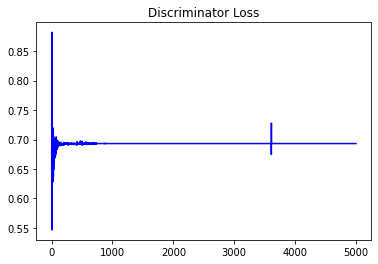

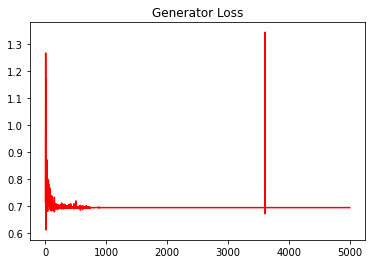

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

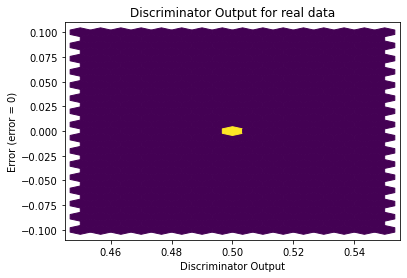

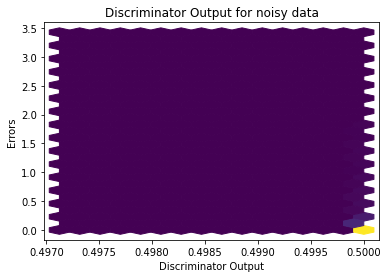

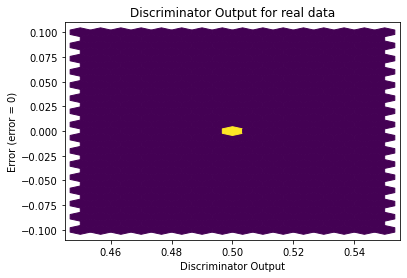

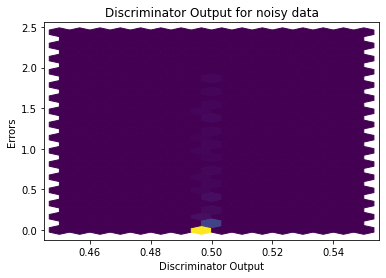

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


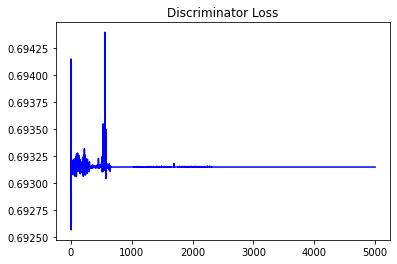

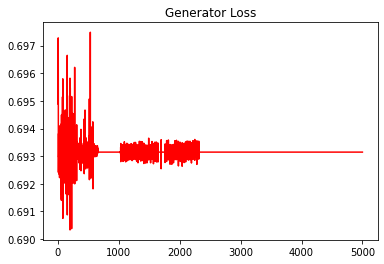

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

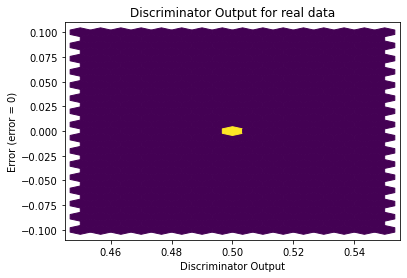

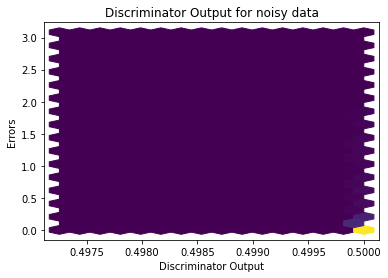

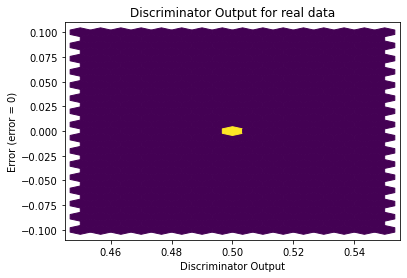

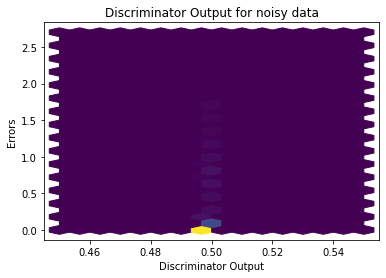

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0071]], device='cuda:0', requires_grad=True)
